# Fehlerbehandlung  

## Kategorien von Fehlern:  
- Syntaxfehler
- Laufzeitfehler
- Semantische Fehler ?? ==> Unit-Test , Akzeptanzklauseln
- Logikfehler ?? ==> White-Box-Testing

**Syntaxfehler:** werden generiert, wenn der Code Rechtschreibfehler enthält:

In [ ]:
prin('Hello') # prin : t am Ende fehlt => Funktion prin ist nicht bekannt

**Laufzeitfehler:** können während der Ausführung des Programms generiert werden

In [ ]:
print(3/0) # generates ZeroDivisionError

Dieses Mal ist ein **Ausnahmefehler** aufgetreten. Dieser Fehlertyp tritt immer dann auf, wenn syntaktisch korrekter Python-Code zu einem Fehler führt. Die letzte Zeile der Nachricht gibt an, auf welche Art von Ausnahmefehler wir gestoßen sind.

Anstatt eine solche Meldung „Ausnahmefehler“ anzuzeigen, gibt Python an, welche Art von Ausnahmefehler aufgetreten ist. Hier haben wir einen ZeroDivisionError bekommen. Python hat bereits verschiedene [eingebaute Ausnahmen](https://docs.python.org/3/library/exceptions.html). Es ist auch möglich, selbst definierte Ausnahmen zu erstellen.

## Auslösen einer Ausnahme

Wir können **raise** verwenden, um eine Ausnahme auszulösen, wenn eine Bedingung eintritt. Die Anweisung kann mit einer benutzerdefinierten Ausnahme abgeschlossen werden.
<br>
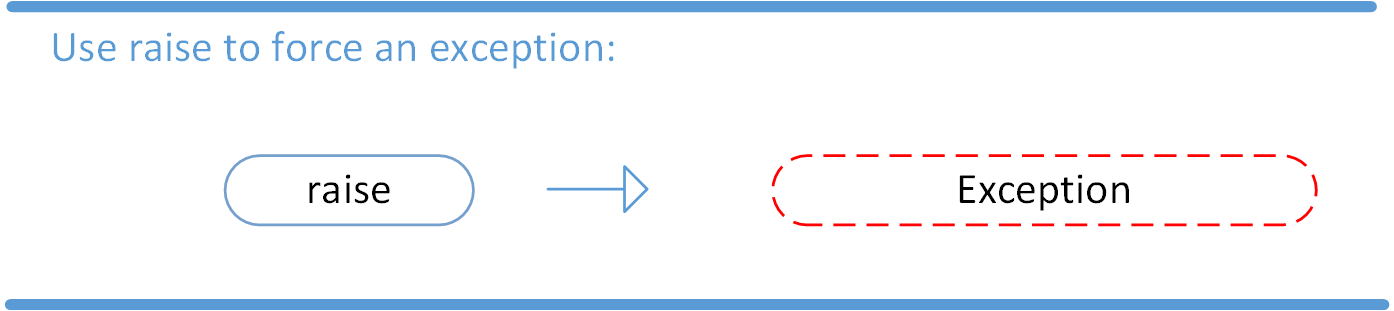
<br>

In [ ]:
x = 10
if x > 5:
    raise Exception(f'x should not exceed 5, The value of x was: {x}')

## Die **AssertionError**-Ausnahme

Anstatt darauf zu warten, dass ein Programm aus einem bestimmten Grund abstürzt, können wir damit beginnen, eine Behauptung in Python aufzustellen. Wir behaupten, dass eine bestimmte Bedingung erfüllt ist. Wenn True, kann das Programm fortfahren, andernfalls löst assert-statement eine AssertionError-Ausnahme aus.

Siehe auch: [sys.platform](https://docs.python.org/3/library/sys.html#sys.platform)

In [ ]:
import sys
sys.platform
#help(sys)

In [ ]:
import sys
print(sys.platform, type(sys.platform))
# assert statement , not a function
assert (sys.platform in ['linux', 'darwin']), "This code runs on Linux or MacOSX only."
#assert (sys.platform in ['linux', 'darwin', 'win32']), "This code runs on Linux or MacOSX only."
#print('Weiter geht es!')
# alternative :
#if not (sys.platform in ['linux', 'darwin'])): raise AssertionError("This code runs on Linux or MacOSX only.")

## Der _try_ and _except_ Block: Umgang mit Ausnahmen


In [ ]:
def linux_test():
    assert ('linux' in sys.platform), "Function can only run on Linux systems."
    print('Do something.')

Der linux_test() kann nur auf einem Linux-System ausgeführt werden. Das Assert in dieser Funktion löst eine AssertError-Ausnahme aus, wenn wir es z. B. auf einem Windows-System aufrufen. Wir können die Funktion also mit dem folgenden Code ausprobieren:

In [ ]:
linux_test()

In [ ]:
try:
    linux_test()
except:
    pass
print('Es geht weiter auch ohne Linux!!')

Wir bekommen keine Meldung. Das Gute daran ist, dass das Programm nicht abgestürzt ist. Aber es wäre schön zu sehen, ob beim Ausführen dieses Codes eine Ausnahme aufgetreten ist. Also müssen wir den Pass in eine entsprechende Aktion ändern:

In [ ]:
try:
    x = 3/0
    linux_test()
except Exception as error:
    print(error)

Der folgende Code ist ein Beispiel, in dem wir die spezielle AssertionError-Ausnahme erfassen und eine eigene Nachricht auf dem Bildschirm ausgeben:

In [ ]:
try:
    #(1,2).append(5)
    x = 3 / 0
    #linux_test()
# except Exception as error:
#     print('Allgemeiner Fehler:', error)
except AssertionError as error:
    print(error)
    print('The linux_test function was not executed!')
except ZeroDivisionError as error:
    print(error)
# except AttributeError as error:
#     print('Attribute stehen nicht zur Verfügung')
except Exception as error:
    print('Allgemeiner Fehler:', error)


Wenn wir nicht wissen, welche Art von (besonderer) Ausnahme auftreten könnte, können wir die allgemeine Ausnahme abfangen. Hier versuchen wir eine Datei namens 'file.log' zu öffnen, siehe auch https://docs.python.org/3/library/functions.html?highlight=open#open

In [ ]:
try:
    with open('file.log') as file:
        read_data = file.read() 
#except:
except FileNotFoundError as error:
    print('Could not open file.log')
    print(error)


In [ ]:
# Name des Fehlers finden
with open('file.log') as file:
    read_data = file.read() 

Dies ist eine Informationsnachricht, und unser Programm wird weiterhin ausgeführt. In dem [Python docs](https://docs.python.org/3/library/exceptions.html), sehen wir viele eingebaute Ausnahmen, die wir hier verwenden können. Eine auf dieser Seite beschriebene Ausnahme ist die folgende:
> Ausnahme FileNotFoundError
Wird ausgelöst, wenn eine Datei oder ein Verzeichnis angefordert wird, aber nicht vorhanden ist. Entspricht errno ENOENT.

Um diese Art von Ausnahme abzufangen und auf dem Bildschirm auszugeben, könnten wir den folgenden Code verwenden:

In [ ]:
try:
    with open('file.log') as file:
        read_data = file.read_data()
except FileNotFoundError as error:
    print(error)

## Warnung:
Catching Exception verbirgt alle Fehler, auch die völlig unerwarteten. Aus diesem Grund vermeiden wir in unseren Programmen Bare-Except-Klauseln.
Stattdessen beziehen wir uns immer auf **_spezifische Ausnahmeklassen_** , die wir abfangen wollen. Sehen Sie sich den folgenden Code an. Hier rufen wir zuerst die Funktion linux_test() auf und versuchen dann, eine Datei zu öffnen:

In [ ]:
try:
    linux_test()
    print('Ende Linux Test!')
    with open('file.log') as file:
        read_data = file.read()
except FileNotFoundError as file_not_found_error:
    print(file_not_found_error)
except AssertionError as error:
    print(error)
    print('Linux linux_test() function was not executed!')

**Kurze Zusammenfassung:**<br>
- Eine try-Klausel wird bis zu dem Punkt ausgeführt, an dem die erste Ausnahme auftritt.
- Innerhalb der _except_-Klausel, oder häufiger im Exception-Handler, bestimmen wir, wie das Programm auf die Exception reagiert.
- (Ausnahmebehandlung mit Benutzerinteraktion sollte auf zentralem und übergeordnetem Codemodul durchgeführt werden ??)
- Wir können mehrere Ausnahmen antizipieren und differenzieren, wie das Programm darauf reagieren soll.
- Try-Block ist eine Art Wrapping, ja, aber nicht mit Decorator-Wrapping zu verwechseln.
- **Vermeiden Sie die Verwendung von bloßen Ausnahmeklauseln !**

**==> Ausnahmebehandlung führt zu einem gut strukturierten Quellcode!**


## The _else_ Clause

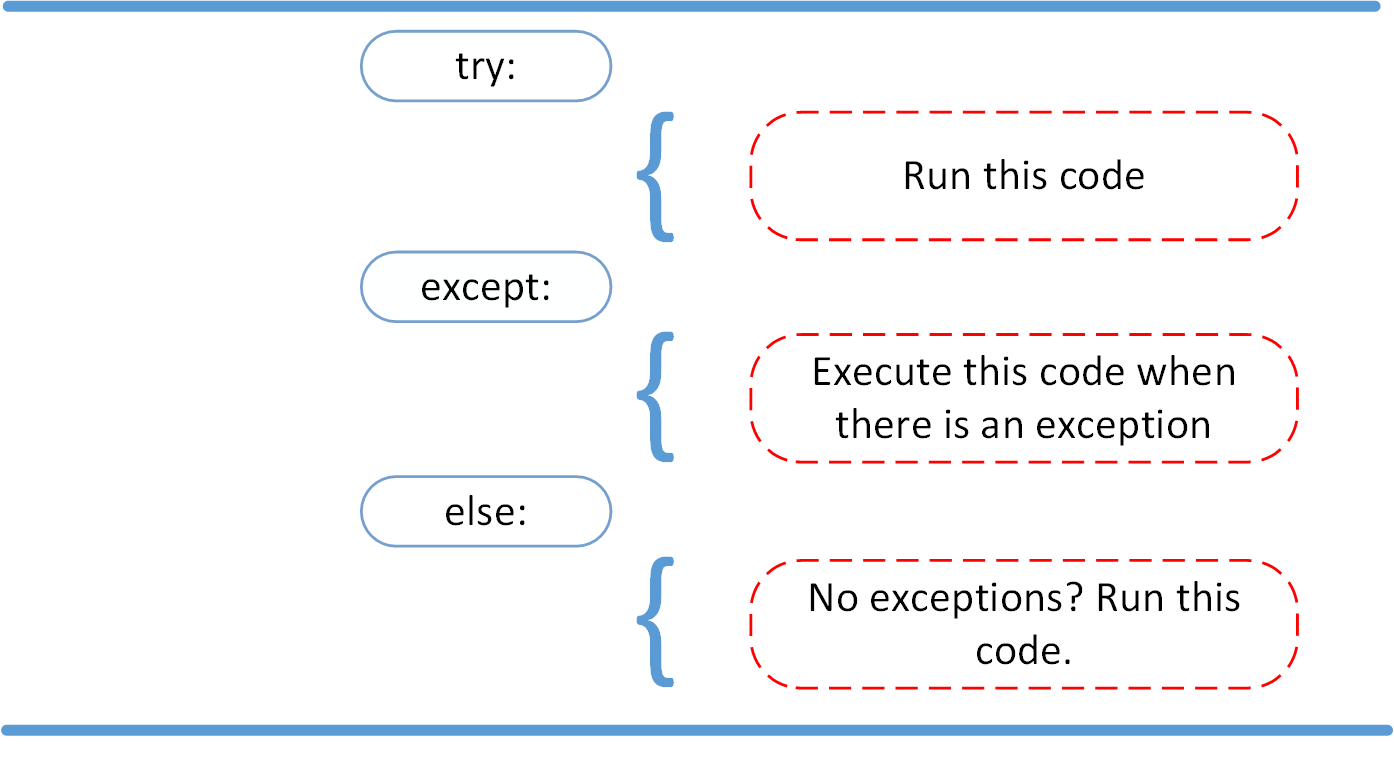
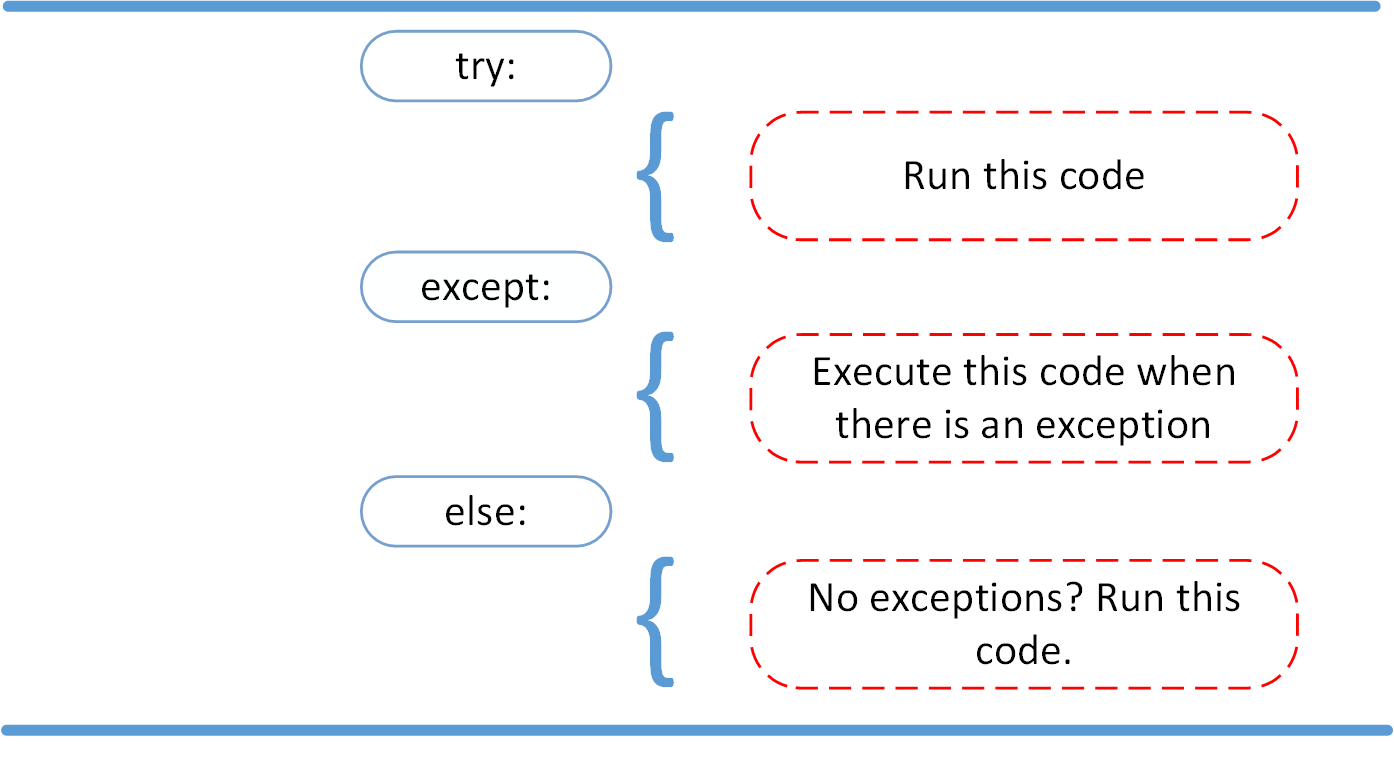

In Python können wir mit der else-Klausel ein Programm anweisen, einen bestimmten Codeblock nur ohne Ausnahmen auszuführen. Schauen wir uns das folgende Beispiel an:

In [ ]:
def windows_test():
    assert ('win32' in sys.platform), "Function can only run on Windows systems."
    print('Do something in Windows.')
    
try:
    windows_test()
except AssertionError as error:
    print(error)
else:
    try:
        print('Try to open file.log')
        with open('file.log') as file:
            read_date = file.read()
    except FileNotFoundError as file_not_found_error:
        print(file_not_found_error)
        

Da keine Ausnahmen aufgetreten sind, wurde versucht, file.log zu öffnen. Diese Datei existierte nicht, und anstatt die Datei zu öffnen, haben wir die FileNotFoundError-Ausnahme abgefangen.

## Aufräumen nach der Verwendung von _finally_

Angenommen, wir müssten eine Aktion implementieren, die immer ausgeführt wird, um nach unserem Code aufzuräumen. Python ermöglicht uns dies mit der **_finally-Klausel_**.
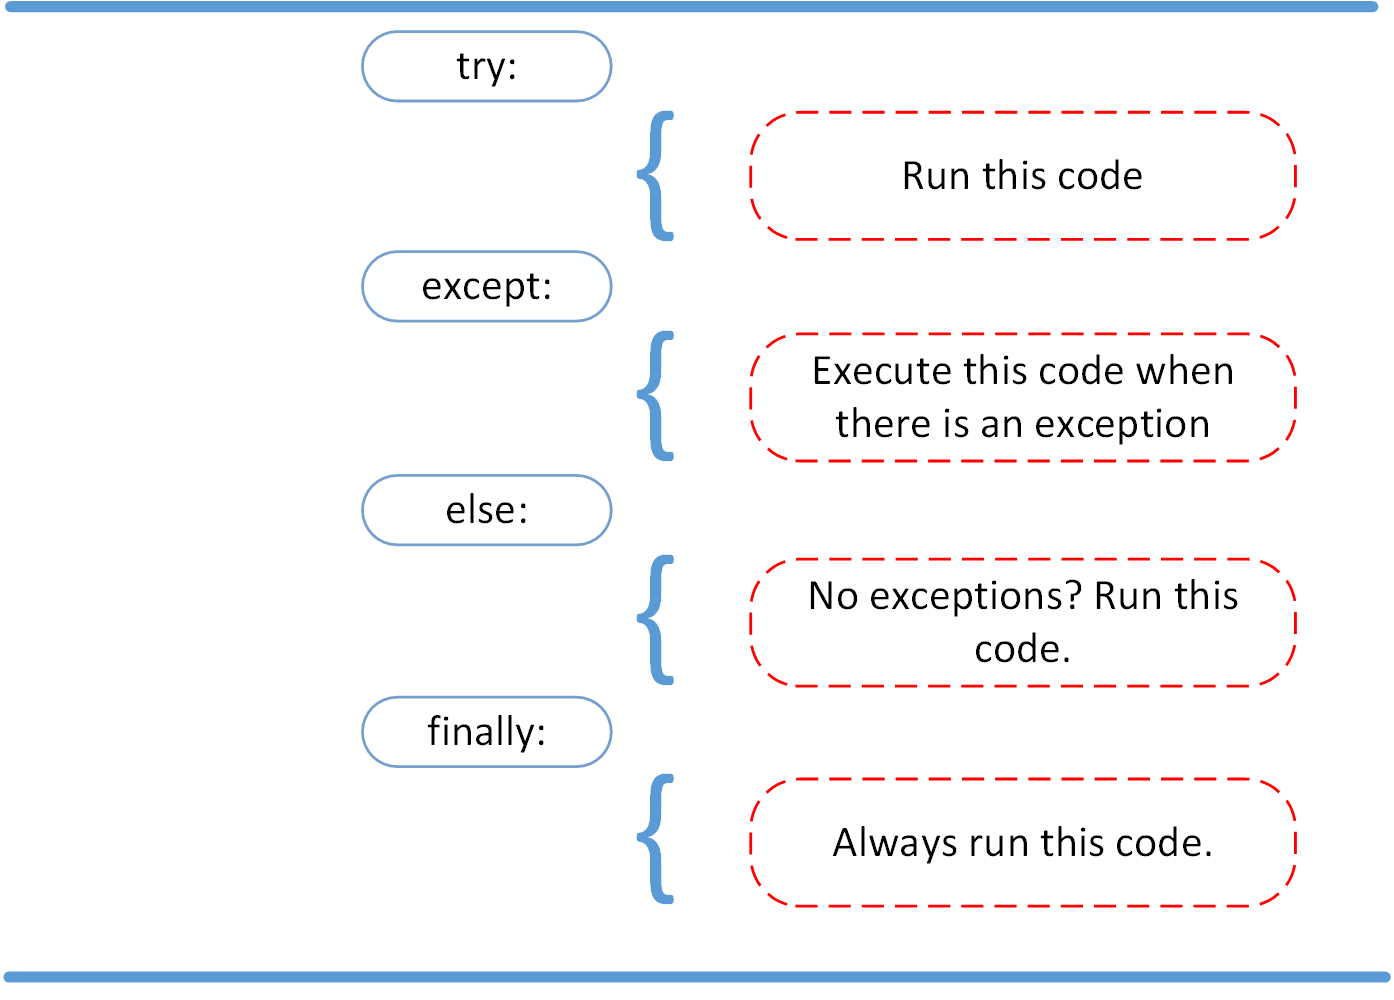
<br>
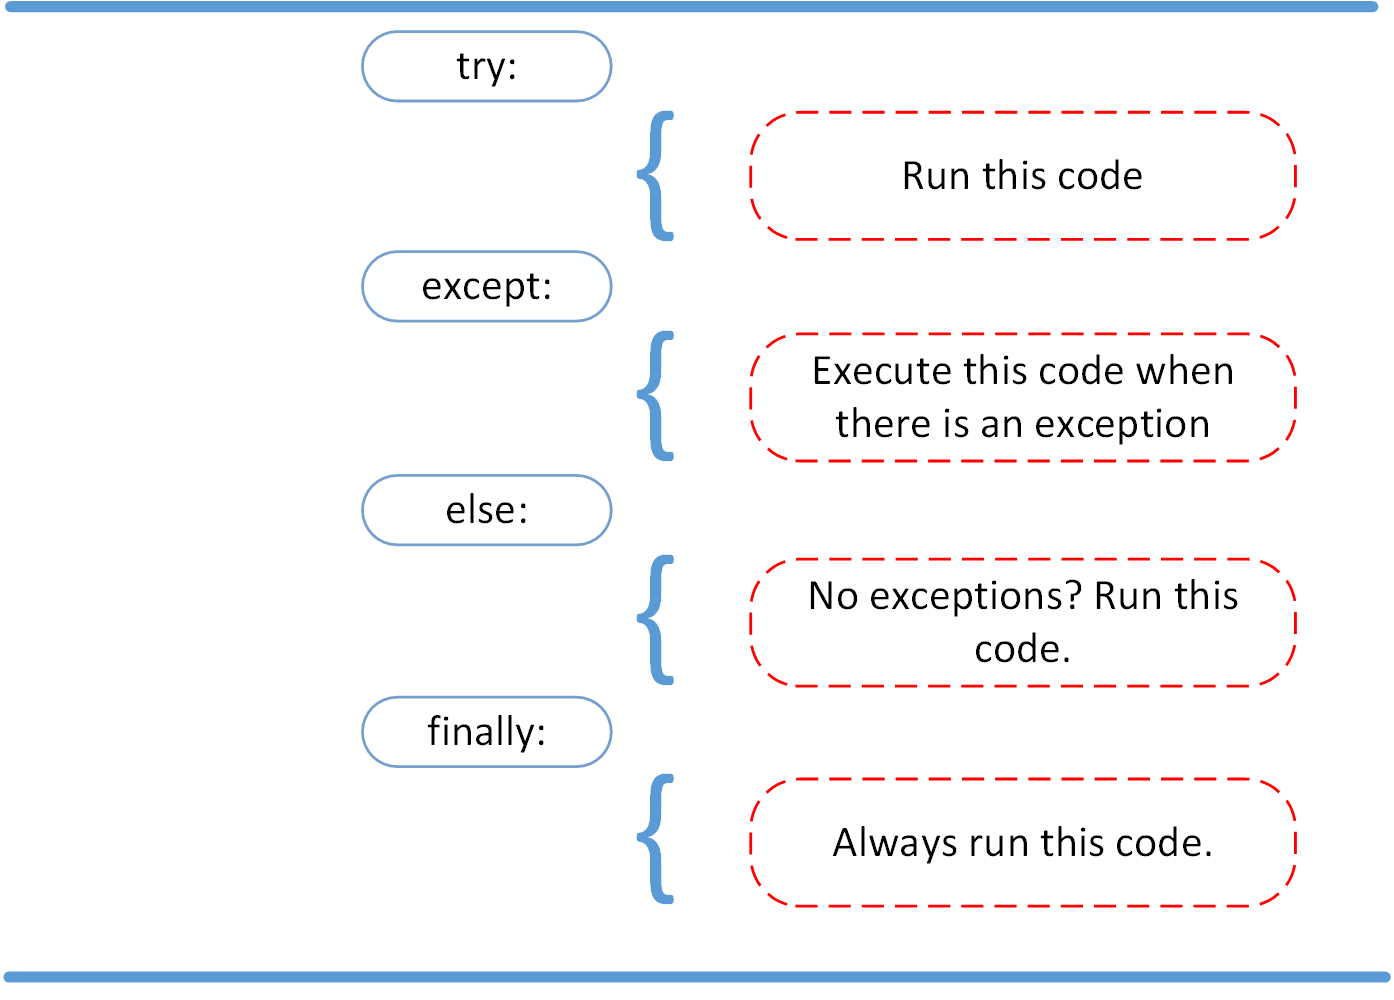
<!-- <br> -->

Sehen Sie sich das folgende Beispiel an:

In [ ]:
try:
    windows_test()
except AssertionError as error:
    print(error)
else:
    try:
        with open('file.log') as file:
            reaf_data = file.read()
    except FileNotFoundError as file_not_found_error:
        print(file_not_found_error)
    finally:
        print('Inner Clean Up!!!!')
finally:
    print('Cleaning up, irrespictive of any exceptions.')

In [ ]:
def final_test():
    try:
        #windows_test()
        #g = 324 / 0   # Division durch 0
        print(-999)
    except AssertionError as error:
        print(error)
        #return 1
    else:
        try:
            with open('file.log') as file:
                reaf_data = file.read()
        except FileNotFoundError as file_not_found_error:
            print(file_not_found_error)
            #return 21
        finally:
            print('Inner Clean Up!!!!')
            #return 22
        
    finally:
        try:
            print(11)
        except ZeroDivisionError as dbz:
            print('22', dbz)
            #return 23
        else:
            print("It's OK")
            #return 24
        
        finally:
            try:
                y = 3/0
            except ZeroDivisionError as err:
                y=0
                print(err)
            finally:
                print(y)
                print('Most Inner Finally')
                #return 31
            
            print('DBZ Finally')
            #return 25
        
        print('Cleaning up, irrespictive of any exceptions.')
        #return 3
        print('oberste Ebene')    
    return 4

print(final_test())